In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
#Visualization
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go
# !pip install -U scikit-learn
import missingno as msno
pd.set_option('display.max_columns', None)

In [32]:
df=pd.read_csv('cleaned_df1.csv')

In [33]:
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08


In [34]:
df.shape

(18312, 27)

## Missing data profiling


Reason for missing Data:
- Data doesn't exist
- Data not collected due to human error.
- Data deleted accidently

### Detecting missing values numerically

The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.

In [35]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [36]:
missings= missing_values_table(df)
missings

Your selected dataframe has 27 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
Description,755,4.1
Comments,477,2.6
Likes,450,2.5
official_video,384,2.1
Licensed,384,2.1
Views,384,2.1
Channel,384,2.1
Title,384,2.1
Url_youtube,384,2.1
Energy,2,0.0


### Detecting missing data visually using Missingno library

To graphically analyse the missingness of the data, let's use a library called Missingno It is a package for graphical analysis of missing values. To use this library, we need to import it as follows: import missingno as msno

<AxesSubplot: >

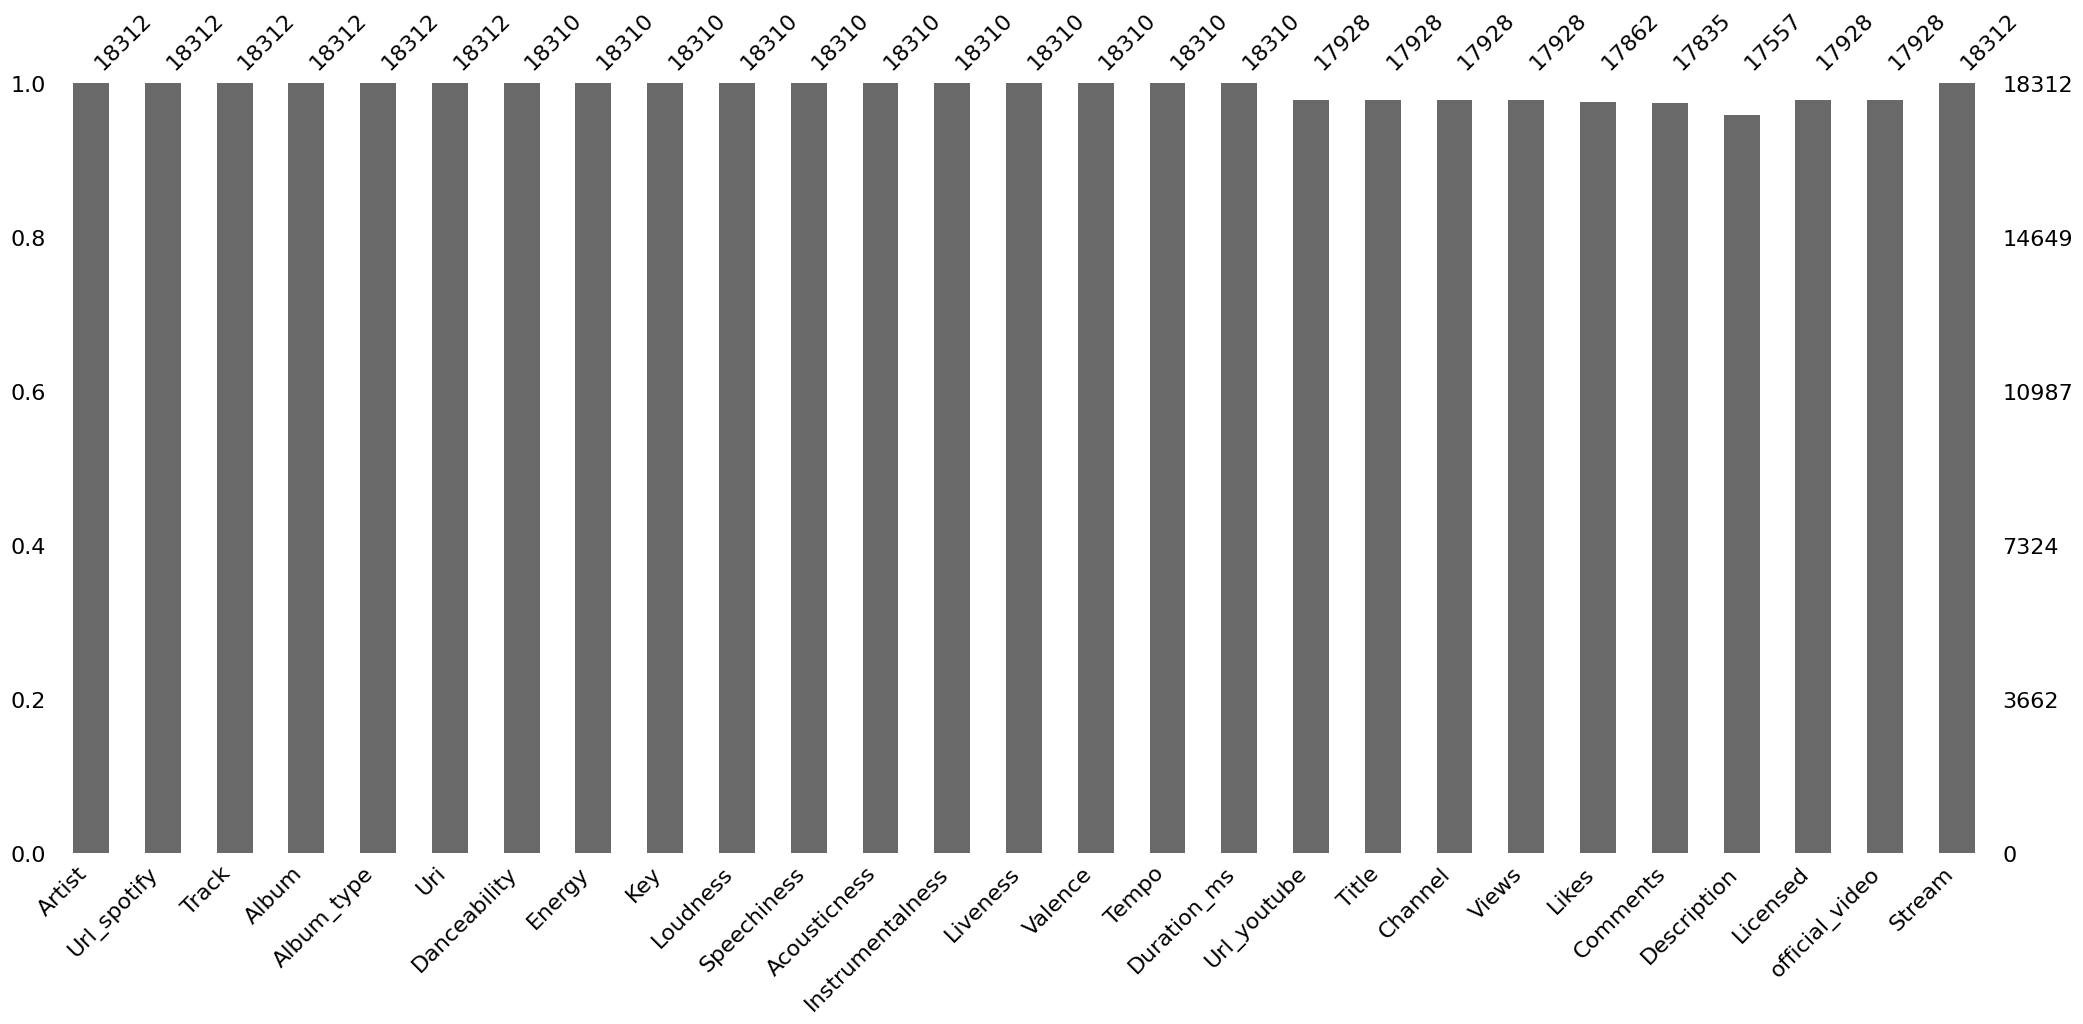

In [8]:
msno.bar(df)

The bar chart above gives a quick graphical overview of the completeness of the dataset.

### Visualizing the locations of the missing data

The msno.matrix nullity matrix is a data-dense display that lets you quickly visually pick out patterns in data completion.

<AxesSubplot: >

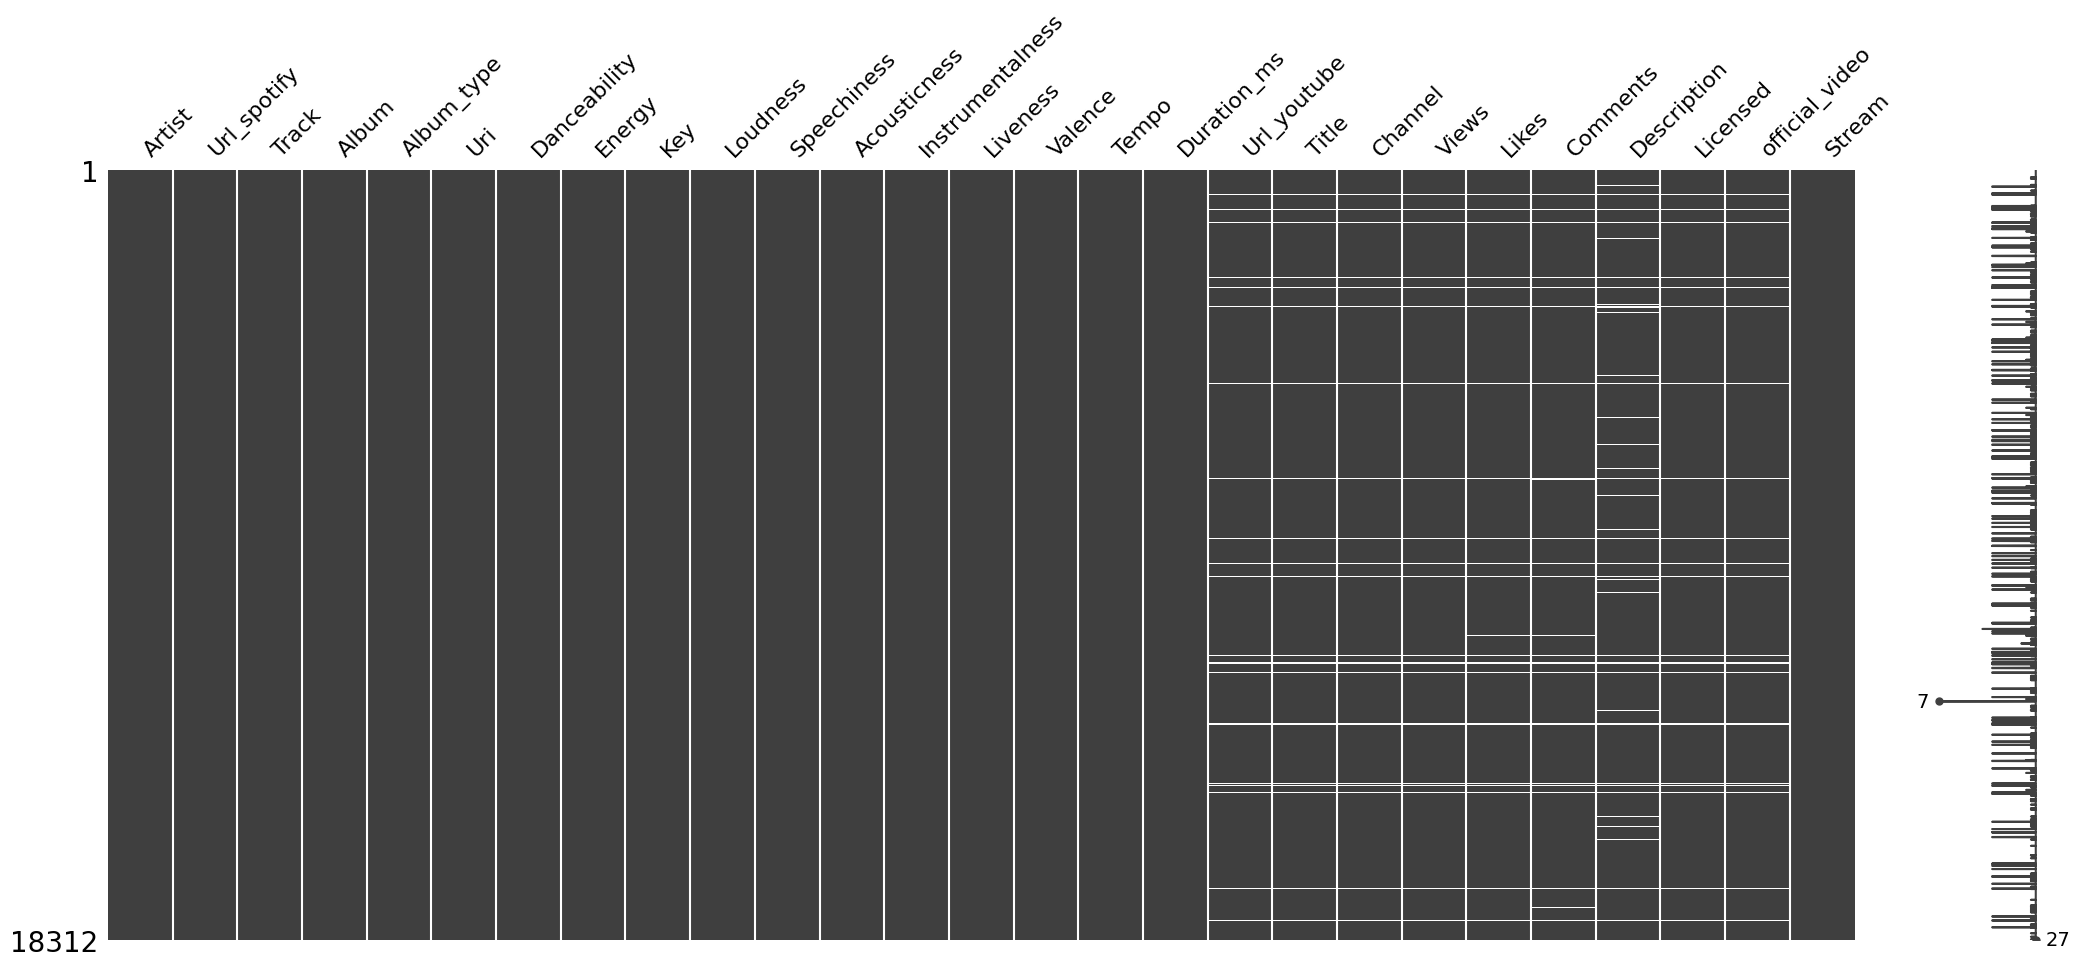

In [9]:
msno.matrix(df)

The plot appears blank(white) wherever there are missing values. The white lines represent instances of missing data.

The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

### Reasons for Missing Values

Before we start treating the missing values,it is important to understand the various reasons for the missingness in data. Broadly speaking, there can be three possible reasons:

#### 1. Missing Completely at Random (MCAR)

The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

#### 2. Missing at Random (MAR)

MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

#### 3. Missing Not at Random (MNAR)

Missingness depends on unobserved data or the value of the missing data itself.

All definitions are taken from Wikipedia: https://en.wikipedia.org/wiki/Missing_data

<AxesSubplot: >

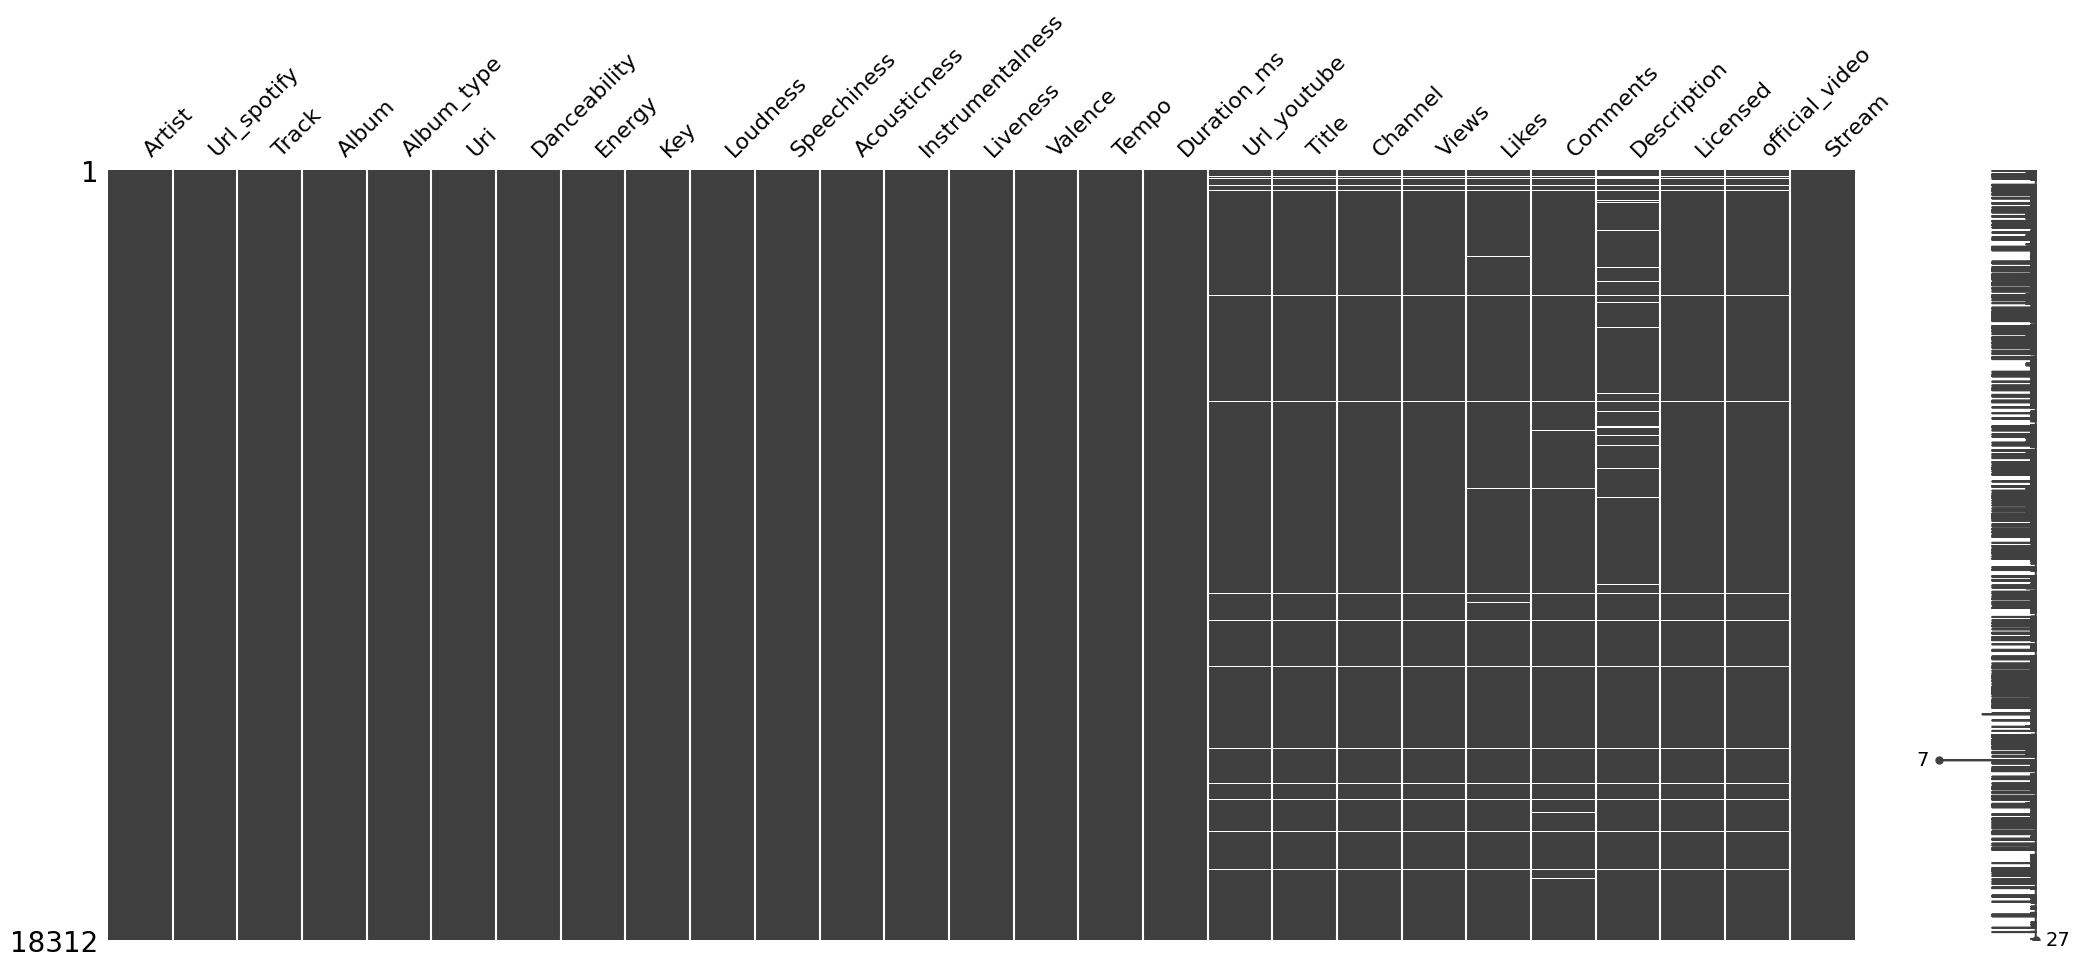

In [10]:
#sorted by Stream
sorted = df.sort_values('Stream')
msno.matrix(sorted)

<AxesSubplot: >

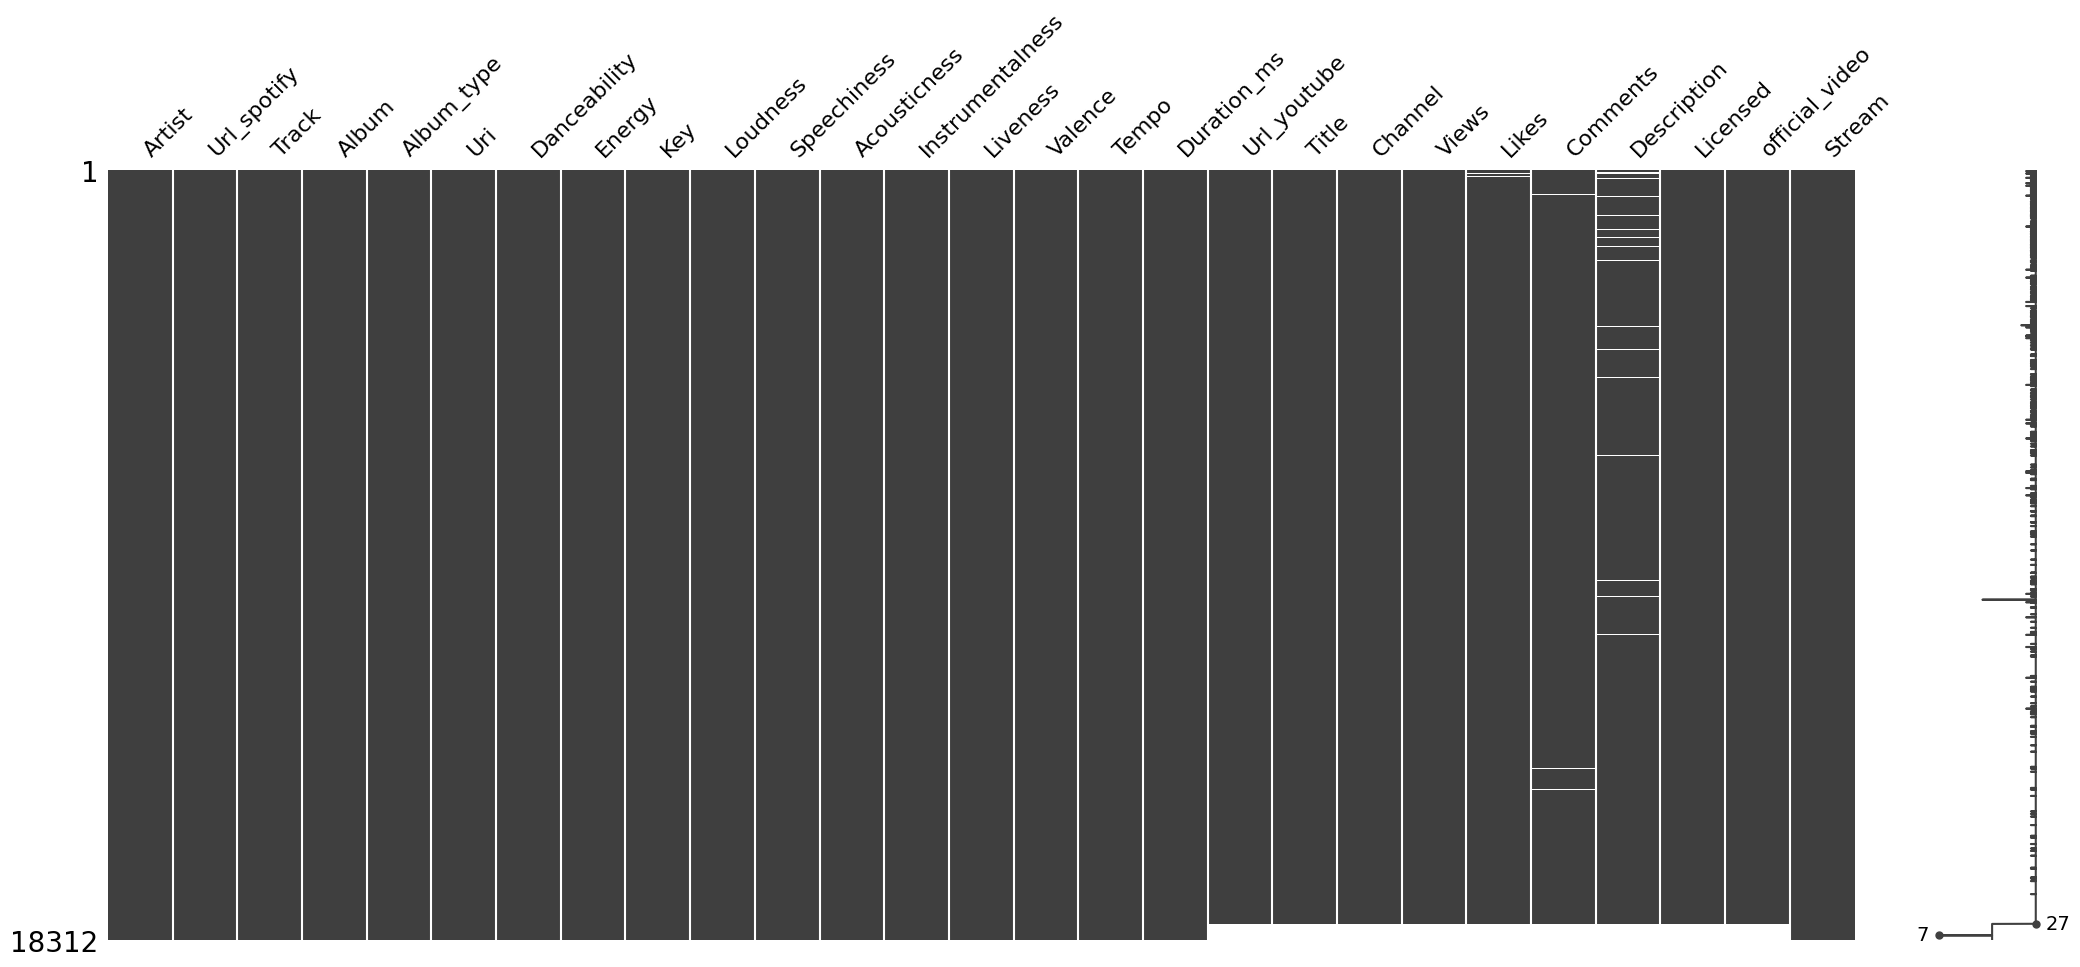

In [11]:
#sorted by views
sorted = df.sort_values('Views')
msno.matrix(sorted)

<AxesSubplot: >

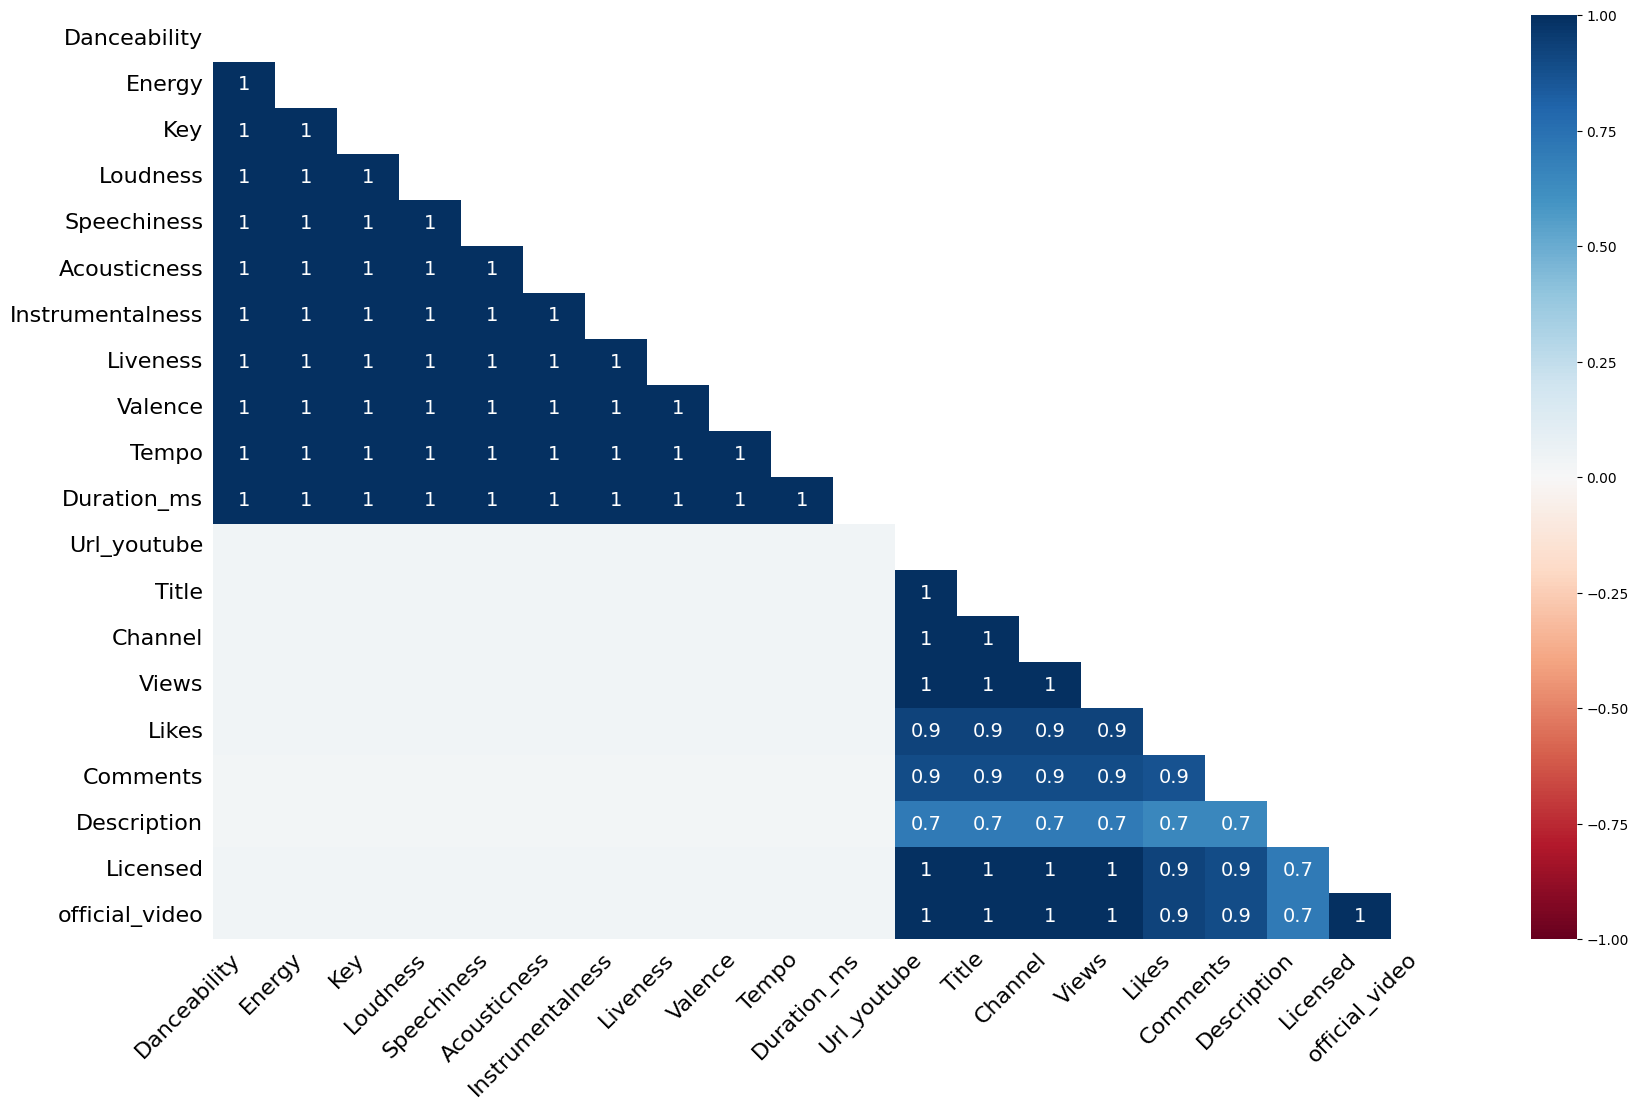

In [12]:
msno.heatmap(df)

### Finding reason for missing data using Dendrogram

A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.

<AxesSubplot: >

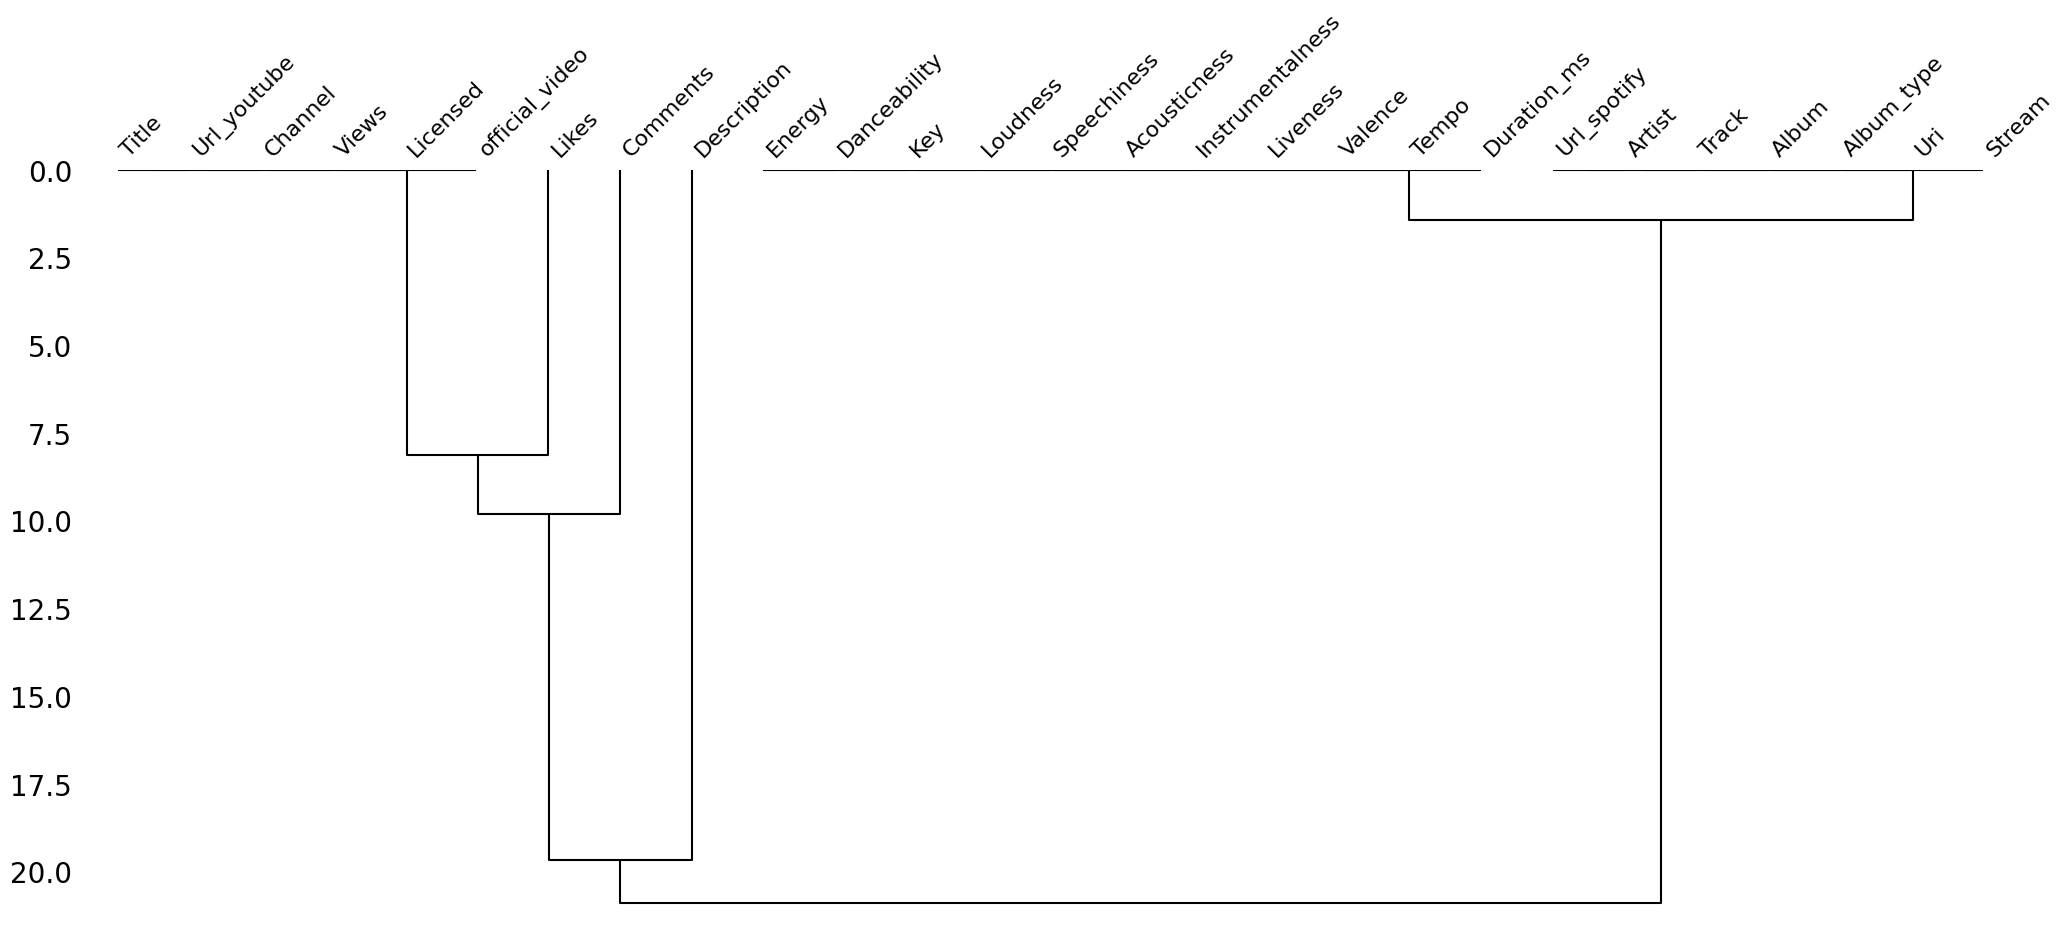

In [13]:
msno.dendrogram(df)

## Missing data imputation

#### Impute categorical missing values as unknown

In [14]:
df['Channel'][df['Channel'].isnull()]='Unknown'
df['Title'][df['Title'].isnull()]='Unknown'
df['Description'][df['Description'].isnull()]='Unknown'
df['Url_youtube'][df['Url_youtube'].isnull()]='Unknown'

In [15]:
missings= missing_values_table(df)
missings

Your selected dataframe has 27 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
Comments,477,2.6
Likes,450,2.5
Views,384,2.1
Licensed,384,2.1
official_video,384,2.1
Danceability,2,0.0
Energy,2,0.0
Key,2,0.0
Loudness,2,0.0
Speechiness,2,0.0


#### Impute numerical variables 

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
numeric_df.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.0,1.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,1.0,1.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,1.0,1.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,1.0,1.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,1.0,1.0,6.172597e+08


In [17]:
# cols_with_few_missing = numeric_df.columns[numeric_df.isna().sum() <= 5]
# cols_with_few_missing

# import sklearn.impute
# from sklearn import impute
# from sklearn.impute import SimpleImputer

# cols_with_few_missing = numeric_df.columns[numeric_df.isna().sum() <= 5]

# imputer = SimpleImputer(strategy="mean")
# df[cols_with_few_missing] = imputer.fit_transform(df[cols_with_few_missing])
# df.isnull().sum()

In [18]:
target=numeric_df['Stream']
numeric_df = numeric_df.drop('Stream', axis=1)

#### Applying normalization to numerical columns

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns = numeric_df.columns)
normalized_df.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video
0,0.838974,0.704994,0.545455,0.838905,0.183610,0.008392,0.002330,0.607306,0.777442,0.569330,0.041260,0.085840,0.122486,0.010564,1.0,1.0
1,0.693333,0.702994,0.727273,0.857222,0.031328,0.087248,0.000687,0.032268,0.858006,0.381149,0.036423,0.008913,0.021247,0.001928,1.0,1.0
2,0.712821,0.922998,0.090909,0.897183,0.054149,0.042670,0.046900,0.102993,0.554884,0.443823,0.039647,0.001044,0.005555,0.000460,1.0,1.0
3,0.706667,0.738995,0.181818,0.857328,0.026971,0.000014,0.509000,0.050228,0.582075,0.494810,0.043677,0.026208,0.035216,0.003434,1.0,1.0
4,0.680000,0.693994,0.909091,0.797609,0.177386,0.025401,0.000000,0.056114,0.528701,0.690108,0.066723,0.076548,0.122022,0.009695,1.0,1.0


## Imputation

We decided to try two different methods to impute the missing data: KNN and MICE.

For the rest of the project we decided to keep the dataset resulted with the MICE imputation.

### Numerical variables imputation with KNN

In [20]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
imputed_data = knn_imputer.fit_transform(normalized_df)

imputed_df = pd.DataFrame(imputed_data, columns=normalized_df.columns,index=normalized_df.index)
imputed_df.isnull().sum()

Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
dtype: int64

In [21]:
denormalized_knn=pd.DataFrame(scaler.inverse_transform(imputed_df), columns=normalized_df.columns,index=normalized_df.index)
denormalized_knn.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.0,1.0
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,1.0,1.0
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,1.0,1.0
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,1.0,1.0
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,1.0,1.0


In [22]:
denormalized_knn['official_video'][denormalized_knn['official_video']<0.5]=0
denormalized_knn['official_video'][denormalized_knn['official_video']>=0.5]=1
denormalized_knn['Licensed'][denormalized_knn['Licensed']<0.5]=0
denormalized_knn['Licensed'][denormalized_knn['Licensed']>=0.5]=1
denormalized_knn['Licensed'].unique()

array([1., 0.])

In [23]:
df_knn=df.copy(deep=True)
df_knn[list(denormalized_knn.columns)]=denormalized_knn

In [24]:
df_knn.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08


In [25]:
df_knn.to_csv("imputedData_knn.csv", encoding='utf-8', index=False)

### Imputation with Multivariate imputation by chained equations (MICE)

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performs multiple regressions over a random sample of the data, then takes the average of the multiple regression values and uses that value to impute the missing value.

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_mice_umputed = numeric_df.copy(deep=True)
mice_imputer = IterativeImputer(random_state=100, max_iter=10)
imputed_mice = mice_imputer.fit_transform(df_mice_umputed)
imputed_mice=pd.DataFrame(imputed_mice, columns=df_mice_umputed.columns,index=df_mice_umputed.index)

In [27]:
imputed_mice.isnull().sum()

Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
dtype: int64

In [28]:
df_mice=df.copy(deep=True)
df_mice[df_mice_umputed.columns]=imputed_mice
df_mice.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08


In [29]:
df_mice['official_video'][df_mice['official_video']<0.5]=0
df_mice['official_video'][df_mice['official_video']>=0.5]=1
df_mice['Licensed'][df_mice['Licensed']<0.5]=0
df_mice['Licensed'][df_mice['Licensed']>=0.5]=1
df_mice['official_video'].unique()

array([1., 0.])

In [30]:
df_mice.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08


In [31]:
df_mice.to_csv("imputedData_mice.csv", encoding='utf-8', index=False)

For the rest of the project we decided to use the result dataset that contains the imputations done with MICE

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6bca811-fc7a-456b-b8f3-4c66c733d95a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>